(a) Sobel Filtering with filter2D:

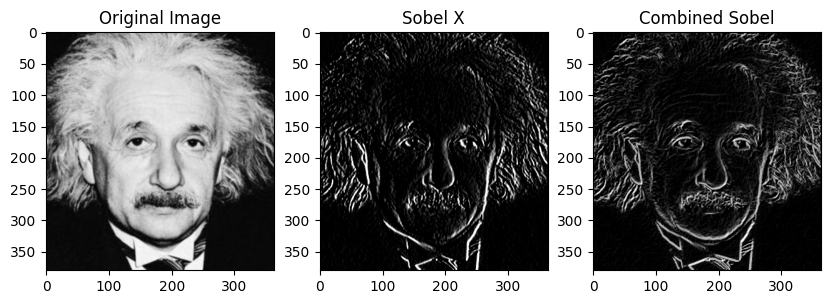

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('utils/einstein.png', cv2.IMREAD_GRAYSCALE)

# Sobel kernels
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply filter2D with Sobel kernels
sobel_x_image = cv2.filter2D(image, -1, sobel_x)
sobel_y_image = cv2.filter2D(image, -1, sobel_y)

# Combine horizontal and vertical gradients
sobel_combined = cv2.magnitude(sobel_x_image.astype(np.float32), sobel_y_image.astype(np.float32))

# Display the results
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(sobel_x_image, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.show()


(b) Sobel Filter Manually:

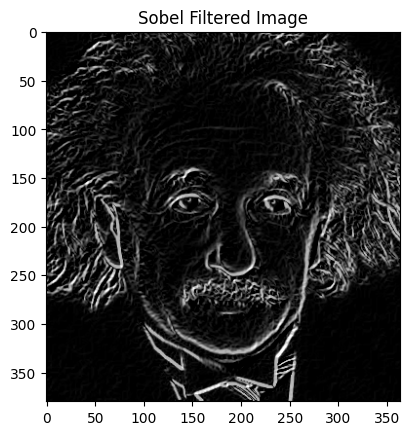

In [2]:
# Function to manually apply the Sobel operator
def sobel_filter(image):
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    # Convolve with the Sobel kernels
    sobel_x_image = cv2.filter2D(image, -1, sobel_x)
    sobel_y_image = cv2.filter2D(image, -1, sobel_y)

    # Combine gradients
    sobel_combined = np.hypot(sobel_x_image, sobel_y_image)
    return sobel_combined

# Apply the function
sobel_filtered_image = sobel_filter(image)

# Display the result
plt.imshow(sobel_filtered_image, cmap='gray')
plt.title('Sobel Filtered Image')
plt.show()

(c) Applying the Property Matrix for Sobel Filtering:

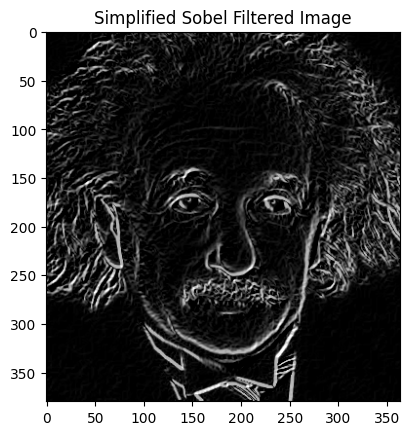

In [3]:
# Apply the simplified Sobel filter using the property matrix
sobel_x_simple = np.array([[1], [2], [1]]) * np.array([[1, 0, -1]])

# Apply convolution with the simplified kernels
sobel_x_filtered = cv2.filter2D(image, -1, sobel_x_simple)
sobel_y_filtered = cv2.filter2D(image, -1, sobel_x.T)  # Use the transpose of sobel_x for vertical filtering

# Combine the results
sobel_combined_simple = cv2.magnitude(sobel_x_filtered.astype(np.float32), sobel_y_filtered.astype(np.float32))

# Display the result
plt.imshow(sobel_combined_simple, cmap='gray')
plt.title('Simplified Sobel Filtered Image')
plt.show()